<a href="https://colab.research.google.com/github/sgevatschnaider/Grafos/blob/main/notebooks/Blockchain_DAG%20con%20explicaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El grafo es un DAG válido.


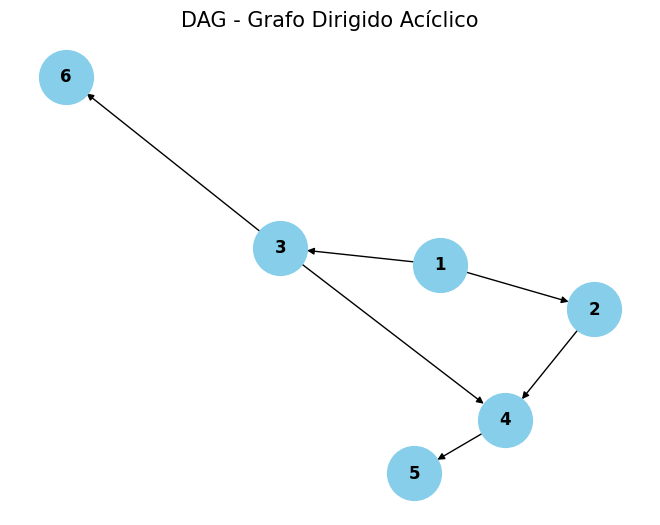

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_and_display_dag():
    # Crear un grafo dirigido
    dag = nx.DiGraph()

    # Agregar nodos al DAG
    dag.add_nodes_from([1, 2, 3, 4, 5, 6])

    # Agregar aristas (debe ser acíclico)
    edges = [
        (1, 2), (1, 3),  # Nodo 1 apunta a 2 y 3
        (2, 4), (3, 4),  # Nodo 2 y 3 apuntan a 4
        (4, 5),          # Nodo 4 apunta a 5
        (3, 6)           # Nodo 3 apunta a 6
    ]
    dag.add_edges_from(edges)

    # Verificar si el grafo es un DAG
    if nx.is_directed_acyclic_graph(dag):
        print("El grafo es un DAG válido.")
    else:
        print("El grafo no es un DAG. Por favor verifica las conexiones.")

    # Dibujar el DAG
    pos = nx.spring_layout(dag)  # Layout para una representación visual clara
    nx.draw(dag, pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=12, font_weight='bold')
    plt.title("DAG - Grafo Dirigido Acíclico", fontsize=15)
    plt.show()

# Llamar a la función para crear y mostrar el DAG
create_and_display_dag()


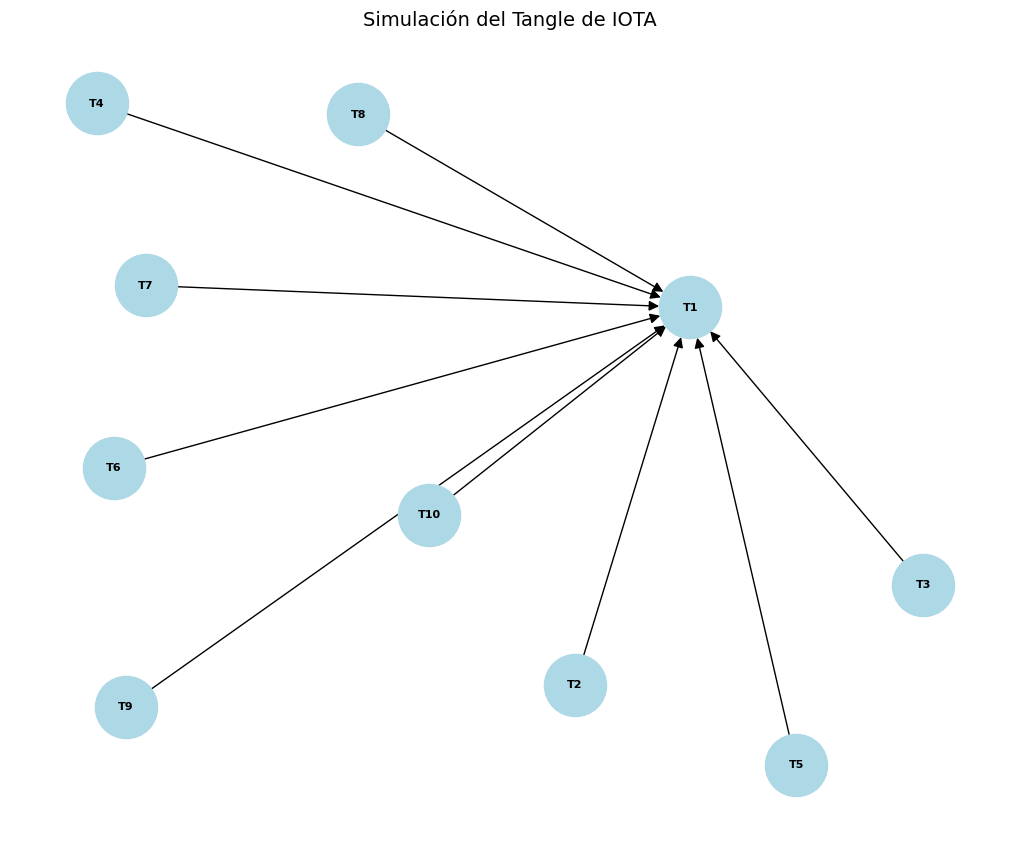

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Simulación de la red IOTA
class IOTATangle:
    def __init__(self):
        self.graph = nx.DiGraph()
        self.transaction_count = 0

    def add_transaction(self):
        # Crear una nueva transacción
        self.transaction_count += 1
        transaction_id = f"T{self.transaction_count}"

        # Seleccionar dos "tips" (transacciones sin confirmación)
        tips = [node for node in self.graph.nodes if self.graph.out_degree(node) == 0]

        # Si no hay tips (al inicio), no se aprueba ninguna
        if len(tips) == 0:
            self.graph.add_node(transaction_id)
        else:
            selected_tips = random.sample(tips, min(2, len(tips)))
            self.graph.add_node(transaction_id)
            for tip in selected_tips:
                self.graph.add_edge(transaction_id, tip)

    def visualize(self):
        # Obtener la posición de los nodos para la visualización
        pos = nx.spring_layout(self.graph)

        # Dibujar el grafo
        plt.figure(figsize=(10, 8))
        nx.draw(
            self.graph, pos, with_labels=True, node_size=2000,
            node_color="lightblue", font_size=8, font_weight="bold", arrowsize=15
        )
        plt.title("Simulación del Tangle de IOTA", fontsize=14)
        plt.show()

# Simulación del Tangle
def simulate_tangle():
    tangle = IOTATangle()

    # Agregar transacciones al Tangle
    for _ in range(10):
        tangle.add_transaction()

    # Visualizar el Tangle
    tangle.visualize()

# Ejecutar la simulación
simulate_tangle()


In [3]:
from IPython.display import display, HTML

html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Simulación del Tangle de IOTA</title>
    <style>
        body {
            font-family: 'Arial', sans-serif;
            line-height: 1.6;
            margin: 20px;
            padding: 20px;
            background-color: #f9f9f9;
            color: #333;
            text-align: justify;
        }
        h1, h2 {
            text-align: center;
            color: #0056b3;
        }
        h1 {
            font-size: 2.5em;
            margin-bottom: 0.5em;
        }
        h2 {
            font-size: 2em;
            margin-top: 1em;
        }
        p, ul, li {
            font-size: 1.1em;
        }
        ul {
            margin-bottom: 20px;
        }
        .highlight {
            font-weight: bold;
            color: #0056b3;
        }
        .separator {
            text-align: center;
            margin: 20px 0;
            clear: both;
        }
        .image-description {
            font-style: italic;
            font-size: 1em;
            margin-top: 10px;
        }
    </style>
</head>
<body>
    <h1>Simulación del Tangle de IOTA</h1>
    <p>La imagen representa una simulación del Tangle de IOTA, que es un grafo acíclico dirigido (<span class="highlight">DAG</span>). Cada círculo (nodo) en el gráfico corresponde a una transacción, y las flechas indican aprobaciones entre transacciones. Aquí tienes una explicación detallada:</p>

    <h2>Transacciones (Nodos):</h2>
    <ul>
        <li><strong>Cada nodo</strong> (como "T1", "T2", "T3", etc.) es una transacción dentro de la red IOTA.</li>
        <li>La transacción más antigua es "T1", y las transacciones posteriores (como "T2", "T3", "T4", etc.) aprueban una o más transacciones anteriores.</li>
    </ul>

    <h2>Aprobaciones (Flechas):</h2>
    <ul>
        <li>Las flechas apuntan de una transacción nueva a una transacción anterior, lo que significa que la nueva transacción aprueba y valida las transacciones anteriores.</li>
        <li>Por ejemplo, "T4" aprueba "T1", y "T7" aprueba "T1" también.</li>
    </ul>

    <h2>Tips (Transacciones No Confirmadas):</h2>
    <ul>
        <li>Las transacciones sin flechas salientes son tips, es decir, transacciones recientes que aún no han sido aprobadas por otras.</li>
        <li>En este caso, "T6", "T7", "T8", "T9" y "T10" son tips, ya que no hay flechas que apunten desde ellas.</li>
    </ul>

    <h2>Red Descentralizada:</h2>
    <ul>
        <li>No hay un bloque central ni un minero que valide las transacciones. En lugar de eso, las transacciones se validan aprobando otras dos transacciones anteriores, lo que garantiza un sistema descentralizado.</li>
    </ul>

    <h2>Crecimiento del Tangle:</h2>
    <ul>
        <li>Cada vez que se agrega una nueva transacción, esta aprueba al menos dos transacciones previas (según el algoritmo de selección de tips).</li>
        <li>Este proceso permite que la red crezca orgánicamente mientras las transacciones más antiguas se vuelven más confiables al recibir más aprobaciones.</li>
    </ul>

    </body>
</html>
"""

display(HTML(html_content))
